# Pratham Raj Sinha 21BIT0092

# Email Spam Detection and Prediction

# About the dataset:

Email Spam Classification Dataset
The csv file contains 5172 rows, each row for each email. There are 3002 columns. 
The first column indicates Email name. The name has been set with numbers and not recipients
name to protect privacy. The last column has the labels for prediction :
    1 for spam, 
    0 for not spam. 
The remaining 3000 columns are the 3000 most common words in all the emails

# Dataset URL

https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

# Importing Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
spam = pd.read_csv('/Users/niladrisinha/Infosec da/emails.csv')
spam.describe()
spam.head()

,the,to,ect,and,for,of,a,you,hou,in,...,will,have,with,your,at,we,s,are,it,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,3,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,2,0,12,9,95,4,3,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,2,0,2,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,1,1,0,2,1,36,3,1,0
4,7,6,17,1,5,2,57,0,9,3,...,0,2,0,0,7,0,19,2,4,0


# Data Description

In [3]:
spam.shape

(5172, 27)

In [4]:
array = spam.values
X = array[:,0:26]
y = array[:,26]

feature_cols = ["the","to","ect","and","for","of","a","you","hou","in","on","is","this","enron","i","be","that","will","have","with","your","at","we","s","are","it"]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# 1. Gradient Boost

In [6]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [7]:
y_pred=model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy for gradient boost:",metrics.accuracy_score(y_test, y_pred))

Accuracy for gradient boost: 0.8833762886597938


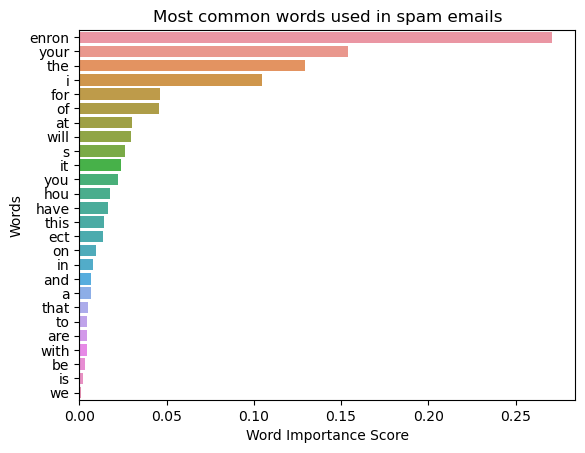

In [8]:
feature_imp = pd.Series(model.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp
%matplotlib inline
# Creating a bar plot
plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Word Importance Score')
plt.ylabel('Words')
plt.title("Most common words used in spam emails")
plt.show()

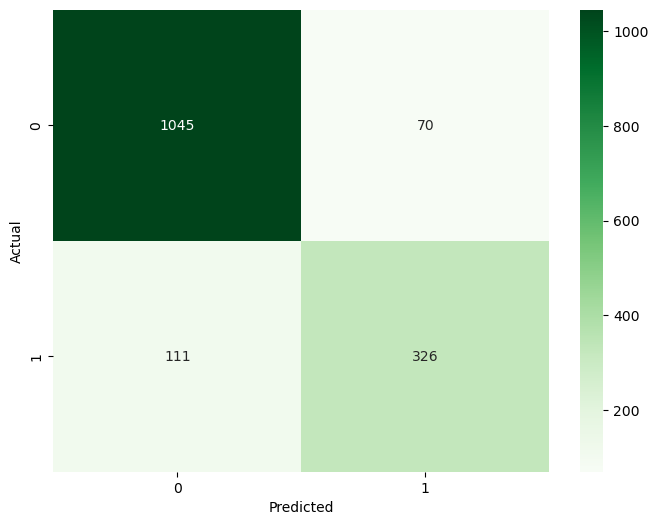

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1115
           1       0.82      0.75      0.78       437

    accuracy                           0.88      1552
   macro avg       0.86      0.84      0.85      1552
weighted avg       0.88      0.88      0.88      1552



In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)

# Classification report
print(report)

In [10]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

True Negative: 1045
False Positive: 70
False Negative: 111
True Positive: 326


In [11]:
Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("1. Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("2. Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("3. Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("4. Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("5. FPR= ",FPR)
print("")
FNR = 1 - TPR
print("6. Miss rate/FNR= ",FNR)
print("")
PPV = TP/(FP+TP)
print("7. Positive Prediction Value= ",PPV)
print("")
NPV = TN/(FN+TN)
print("8. Negative Predictive Value= ",PPV)
print("")
PL = TPR/(1-TNR)
print("9. Positive Likelihood= ",PL)
print("")
NL = FNR/TNR
print("10. Negative Likelihood= ",NL)
print("")

1. Accuracy=  0.8833762886597938

2. Error rate=  0.11662371134020619

3. Sensitivity/TPR=  0.7459954233409611

4. Specificity/TNR=  0.9372197309417041

5. FPR=  0.06278026905829592

6. Miss rate/FNR=  0.25400457665903886

7. Positive Prediction Value=  0.8232323232323232

8. Negative Predictive Value=  0.8232323232323232

9. Positive Likelihood=  11.882641386073889

10. Negative Likelihood=  0.2710192372964864



# 2. Support Vector Machine

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",random_state=0)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [13]:
svc_y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy for SVM:",accuracy_score(y_test, y_pred))

Accuracy for SVM: 0.8833762886597938


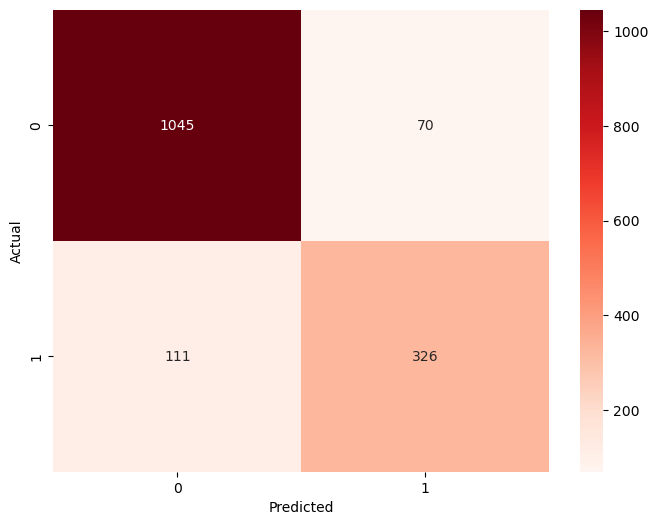

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1115
           1       0.82      0.75      0.78       437

    accuracy                           0.88      1552
   macro avg       0.86      0.84      0.85      1552
weighted avg       0.88      0.88      0.88      1552



In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)

# Classification report
print(report)

In [15]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

True Negative: 1045
False Positive: 70
False Negative: 111
True Positive: 326


In [16]:
Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("1. Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("2. Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("3. Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("4. Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("5. FPR= ",FPR)
print("")
FNR = 1 - TPR
print("6. Miss rate/FNR= ",FNR)
print("")
PPV = TP/(FP+TP)
print("7. Positive Prediction Value= ",PPV)
print("")
NPV = TN/(FN+TN)
print("8. Negative Predictive Value= ",PPV)
print("")
PL = TPR/(1-TNR)
print("9. Positive Likelihood= ",PL)
print("")
NL = FNR/TNR
print("10. Negative Likelihood= ",NL)
print("")

1. Accuracy=  0.8833762886597938

2. Error rate=  0.11662371134020619

3. Sensitivity/TPR=  0.7459954233409611

4. Specificity/TNR=  0.9372197309417041

5. FPR=  0.06278026905829592

6. Miss rate/FNR=  0.25400457665903886

7. Positive Prediction Value=  0.8232323232323232

8. Negative Predictive Value=  0.8232323232323232

9. Positive Likelihood=  11.882641386073889

10. Negative Likelihood=  0.2710192372964864



# 3. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train,y_train)

/Users/niladrisinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Accuracy for LR:",accuracy_score(y_test, y_pred))

Accuracy for LR: 0.8563144329896907


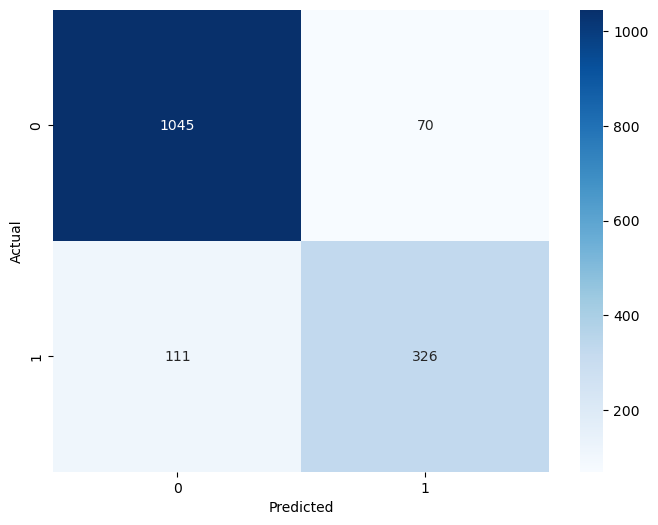

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1115
           1       0.82      0.62      0.71       437

    accuracy                           0.86      1552
   macro avg       0.84      0.79      0.81      1552
weighted avg       0.85      0.86      0.85      1552



In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
lr_cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)

# Classification report
print(report)

In [23]:
TN = lr_cm[0][0]
FP = lr_cm[0][1]
FN = lr_cm[1][0]
TP = lr_cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

True Negative: 1056
False Positive: 59
False Negative: 164
True Positive: 273


In [24]:
Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("1. Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("2. Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("3. Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("4. Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("5. FPR= ",FPR)
print("")
FNR = 1 - TPR
print("6. Miss rate/FNR= ",FNR)
print("")
PPV = TP/(FP+TP)
print("7. Positive Prediction Value= ",PPV)
print("")
NPV = TN/(FN+TN)
print("8. Negative Predictive Value= ",PPV)
print("")
PL = TPR/(1-TNR)
print("9. Positive Likelihood= ",PL)
print("")
NL = FNR/TNR
print("10. Negative Likelihood= ",NL)
print("")

1. Accuracy=  0.8563144329896907

2. Error rate=  0.14368556701030927

3. Sensitivity/TPR=  0.6247139588100686

4. Specificity/TNR=  0.947085201793722

5. FPR=  0.05291479820627798

6. Miss rate/FNR=  0.37528604118993136

7. Positive Prediction Value=  0.822289156626506

8. Negative Predictive Value=  0.822289156626506

9. Positive Likelihood=  11.806034984291985

10. Negative Likelihood=  0.3962537272033839



# 4. Linear Discriminant Analysis

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [26]:
lda_y_pred = lda.predict(X_test)

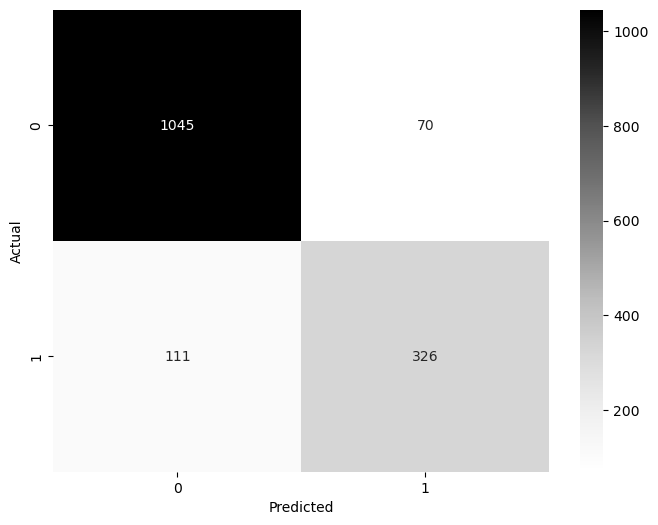

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1115
           1       0.82      0.62      0.71       437

    accuracy                           0.86      1552
   macro avg       0.84      0.79      0.81      1552
weighted avg       0.85      0.86      0.85      1552



In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
ld_cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)

# Classification report
print(report)

In [28]:
TN = ld_cm[0][0]
FP = ld_cm[0][1]
FN = ld_cm[1][0]
TP = ld_cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

True Negative: 1056
False Positive: 59
False Negative: 164
True Positive: 273


In [29]:
Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("1. Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("2. Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("3. Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("4. Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("5. FPR= ",FPR)
print("")
FNR = 1 - TPR
print("6. Miss rate/FNR= ",FNR)
print("")
PPV = TP/(FP+TP)
print("7. Positive Prediction Value= ",PPV)
print("")
NPV = TN/(FN+TN)
print("8. Negative Predictive Value= ",PPV)
print("")
PL = TPR/(1-TNR)
print("9. Positive Likelihood= ",PL)
print("")
NL = FNR/TNR
print("10. Negative Likelihood= ",NL)
print("")

1. Accuracy=  0.8563144329896907

2. Error rate=  0.14368556701030927

3. Sensitivity/TPR=  0.6247139588100686

4. Specificity/TNR=  0.947085201793722

5. FPR=  0.05291479820627798

6. Miss rate/FNR=  0.37528604118993136

7. Positive Prediction Value=  0.822289156626506

8. Negative Predictive Value=  0.822289156626506

9. Positive Likelihood=  11.806034984291985

10. Negative Likelihood=  0.3962537272033839



# 5. Neural Networks

In [30]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

/Users/niladrisinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

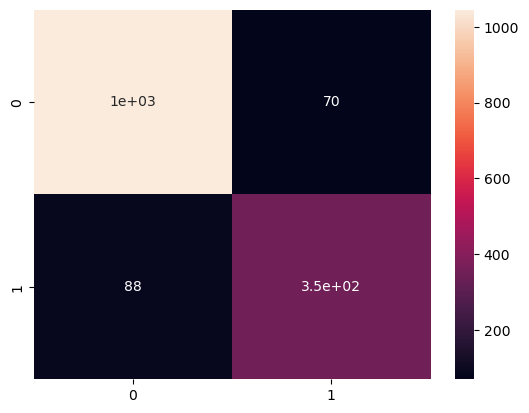

In [31]:
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(y_test,predictions)
sns.heatmap(nn_cm,annot = True)

In [32]:
TN = nn_cm[0][0]
FP = nn_cm[0][1]
FN = nn_cm[1][0]
TP = nn_cm[1][1]

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)

True Negative: 1045
False Positive: 70
False Negative: 88
True Positive: 349


In [33]:
Total = TN+TP+FP+FN
Accuracy = (TP+TN)/(Total)
print("1. Accuracy= ",Accuracy)
print("")
ER = (FP+FN)/(Total)
print("2. Error rate= ",ER)
print("")
TPR = TP/(TP+FN)
print("3. Sensitivity/TPR= ",TPR)
print("")
TNR = TN/(FP+TN)
print("4. Specificity/TNR= ",TNR)
print("")
FPR = 1 - TNR
print("5. FPR= ",FPR)
print("")
FNR = 1 - TPR
print("6. Miss rate/FNR= ",FNR)
print("")
PPV = TP/(FP+TP)
print("7. Positive Prediction Value= ",PPV)
print("")
NPV = TN/(FN+TN)
print("8. Negative Predictive Value= ",PPV)
print("")
PL = TPR/(1-TNR)
print("9. Positive Likelihood= ",PL)
print("")
NL = FNR/TNR
print("10. Negative Likelihood= ",NL)
print("")

1. Accuracy=  0.8981958762886598

2. Error rate=  0.1018041237113402

3. Sensitivity/TPR=  0.7986270022883295

4. Specificity/TNR=  0.9372197309417041

5. FPR=  0.06278026905829592

6. Miss rate/FNR=  0.2013729977116705

7. Positive Prediction Value=  0.8329355608591885

8. Negative Predictive Value=  0.8329355608591885

9. Positive Likelihood=  12.720987250735542

10. Negative Likelihood=  0.21486209803685416

